In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
name = 'millikan.txt'
data = np.loadtxt(name, dtype = 'float')
x = data[:,0]
y = data[:,1]

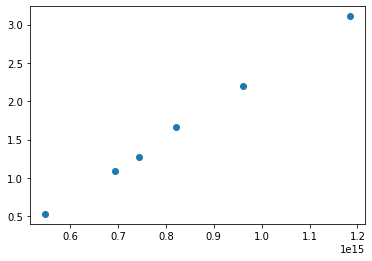

In [3]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [4]:
def LeastSq(x,y):
    N = len(x)
    Ex = 1/N*np.sum(x)
    Ey = 1/N*np.sum(y)
    Ex2 = 1/N*np.sum(x**2)
    Exy = 1/N*np.sum(x*y)
    m = (Exy - Ex*Ey)/(Ex2-Ex**2)
    c = (Ex2*Ey - Exy*Ex)/(Ex2-Ex**2)
    return m, c

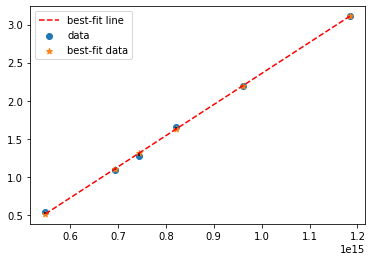

In [5]:
plt.figure()
plt.scatter(x,y,label = 'data')
m,c = LeastSq(x,y)
X = np.linspace(np.min(x),np.max(x),1000)
for i in range(len(x)):
    plt.plot([x[i], x[i]],[y[i], m*x[i] + c],'--k')
plt.scatter(x, m*x+c, marker = '*', label = 'best-fit data')
plt.plot(X,m*X+c,'--r',label = 'best-fit line')
plt.legend()
plt.show()

In [6]:
def Planck(v,V):
    e = 1.602e-19
    he, wf = LeastSq(v,V)
    h = he*e
    return h, wf

print(Planck(x,y))
print('Planck constant is:', scipy.constants.Planck)

(6.549340228345038e-34, -1.73123580398135)
Planck constant is: 6.62607015e-34


In [7]:
def Intergrand(f,x_min,x_max, option,N):
    h = (x_max-x_min)/N
    x = np.linspace(x_min,x_max,N)
    if option == 'trap':
        x = x[:-1]
        I = np.sum(h*(f(x)+f(x+h)))/2
    if option == 'simpson':
        if N % 2 == 1:
            raise ValueError("the number of value must be an even integer.")
        x = np.linspace(x_min,x_max,N+1)
        y = f(x)
        I = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return I

In [8]:
def f(x):
    return x**4 - 2*x + 1

value = 2**5/5 - 2**2 + 2
print(f"Actual Integral from 0 to 2: {value}")

N = 10000
value1 = Intergrand(f,0,2,'trap',N)
value2 = Intergrand(f,0,2,'simpson',N)
print(f"Estimate using Trapezium Rule: {round(value1,5)}")
print(f"Estimate using Simpson Rule: {round(value2,33)}")

Actual Integral from 0 to 2: 4.4
Estimate using Trapezium Rule: 4.39956
Estimate using Simpson Rule: 4.400000000000001


Text(0, 0.5, 'Cv')

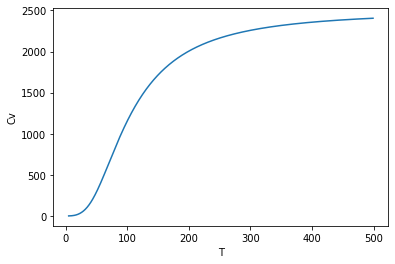

In [9]:
def cv(T):
    def f(x):
        return x**4*np.exp(x)/(np.exp(x) - 1)**2
    k_B = scipy.constants.k
    theta = 428
    V = 1000e-6
    rho = 6.022e28
    return 9*V*rho*k_B*(T/theta)**3*scipy.integrate.fixed_quad(f,0,theta/T,n = 50)[0]

T = np.arange(5,500)
Cv = []
for t in T:
    Cv.append(cv(t))
plt.plot(T, Cv)
plt.xlabel('T')
plt.ylabel('Cv')